# PCA Analysis on HR Dataset

This notebook performs Principal Component Analysis (PCA) on an HR dataset to reduce its dimensionality and visualize the results. Below is a step-by-step documentation of the workflow.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the dataset
data = pd.read_csv("Datasets/HRdata.csv")

# Display the first few rows of the dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Encoding Categorical Variables

We convert the categorical variables 'sales' and 'salary' into numerical codes for easier processing.

In [6]:
data['sales'] = data['sales'].astype('category').cat.codes
data['salary'] = data['salary'].astype('category').cat.codes

## Separating Features and Target

We separate the features (X) from the target variable (y), which indicates whether an employee left the company.

In [7]:
# Separate Features and Target
X = data.drop(columns=['left'])  # Assuming 'left' is the target variable
y = data['left']

## Standardizing the Data

We standardize the features to have a mean of 0 and a standard deviation of 1, which is a common preprocessing step for PCA.

In [8]:
# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Applying PCA

We create a PCA object and fit it to the standardized data. We then transform the data into principal components.

In [9]:
# Create a PCA object
pca = PCA()

# Fit PCA on the scaled data
pca.fit(X_scaled)

# Transform data to principal components
X_pca = pca.transform(X_scaled)

## Explained Variance

We calculate and display the explained variance for each principal component to understand how much information each component captures.

In [10]:
# Get the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Display explained variance
print("Explained Variance by Each Component:\n", explained_variance)

Explained Variance by Each Component:
 [0.20337132 0.12539679 0.11916946 0.1112455  0.11013618 0.10546608
 0.09391882 0.07039443 0.06090143]


## Cumulative Explained Variance Plot

We plot the cumulative explained variance to determine the optimal number of components to retain.

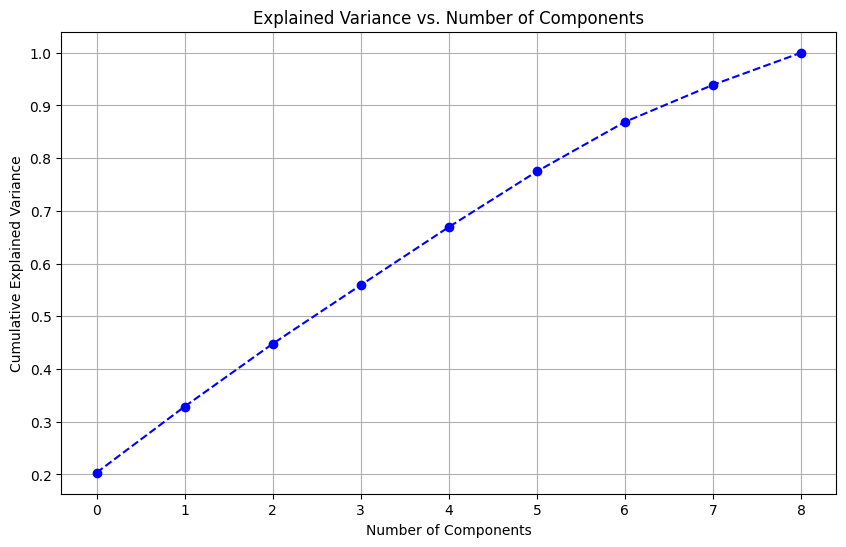

In [11]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

In [12]:
# Choose n_components based on the cumulative explained variance plot
pca = PCA(n_components=2)
X_pca_optimal = pca.fit_transform(X_scaled)

## Scatter Plot of Principal Components

We create a scatter plot of the first two principal components to visualize the data in reduced dimensions.

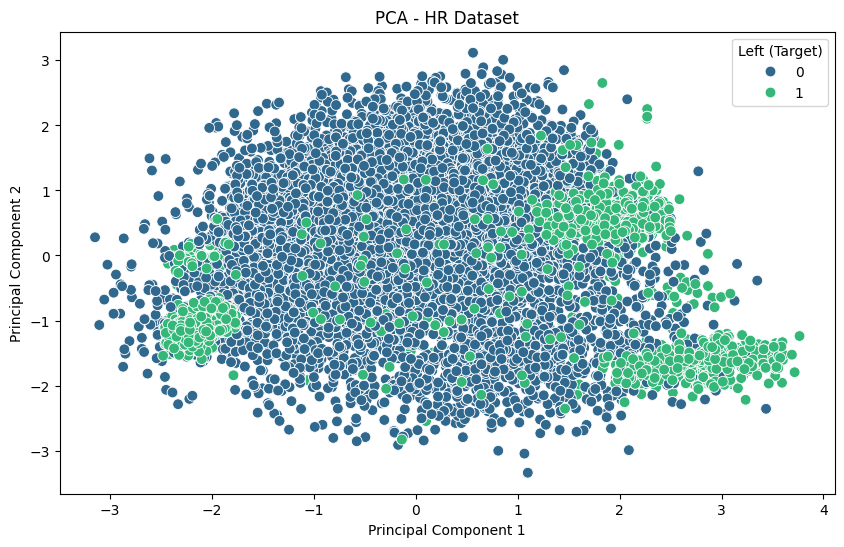

In [13]:
# Scatter Plot of the Principal Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_optimal[:, 0], y=X_pca_optimal[:, 1], hue=y, palette='viridis', s=60)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - HR Dataset")
plt.legend(title="Left (Target)")
plt.show()

## Component Loadings

We calculate the loadings of each feature on the principal components and display them in a DataFrame.

In [14]:
# Component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame to display loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)
print("Component Loadings:\n", loadings_df)

Component Loadings:
                             PC1       PC2
satisfaction_level    -0.118529  0.842364
last_evaluation        0.686036  0.353551
number_project         0.783043 -0.107681
average_montly_hours   0.742700  0.111679
time_spend_company     0.423694 -0.320533
Work_accident         -0.026125  0.377803
promotion_last_5years  0.013138  0.075516
sales                  0.008501  0.077180
salary                 0.023806  0.113431
